# Exrecise Setup

Imports

In [1]:
# import
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

CSV File Loads

In [150]:
base_path = os.path.abspath(os.curdir)

ex1_path = f"{base_path}\\EX1_csv.csv"
ex1_df = pd.read_csv(ex1_path, sep=',')

ex2_path = f"{base_path}\\army.csv"
army_df = pd.read_csv(ex2_path, sep=',')

ex4_path = f"{base_path}\\crime_USA.csv"
crime_USA_df = pd.read_csv(ex4_path, sep=',')

ex5_path = f"{base_path}\\tips.csv"
tips_df = pd.read_csv(ex5_path, sep=',')

# Section 1: knowing your data

In [112]:
# presents file first 25 rows
ex1_df.head(25)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,5201
8,9,29,M,student,1002
9,10,53,M,lawyer,90703


In [113]:
# presents file last 10 rows
ex1_df.tail(10)

,user_id,age,gender,occupation,zip_code
933,934,61,M,engineer,22902
934,935,42,M,doctor,66221
935,936,24,M,other,32789
936,937,48,M,educator,98072
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,2215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [114]:
# presents total number of rows, total number of cols and all file headers
print(ex1_df.shape)
num_rows = ex1_df.shape[0]
num_cols = ex1_df.shape[1]
headers = list(ex1_df.columns.values)

msg = f"number of rows: {num_rows}\n" +\
      f"number of cols: {num_cols}\n" +\
      f"table headers: {headers}"
print(msg)

(943, 5)
number of rows: 943
number of cols: 5
table headers: ['user_id', 'age', 'gender', 'occupation', 'zip_code']


In [115]:
# presents the file index
ex1_df.index

RangeIndex(start=0, stop=943, step=1)

In [116]:
# presents all cols data types
ex1_df.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [117]:
# presents all elements of occupation col
ex1_df['occupation']

0         technician
1              other
2             writer
3         technician
4              other
           ...      
938          student
939    administrator
940          student
941        librarian
942          student
Name: occupation, Length: 943, dtype: object

In [118]:
# presents total number of occupations
occ_grouped = ex1_df.groupby('occupation')
len(occ_grouped)

21

In [119]:
# presents most common occupation
occ_grouped['occupation'].count().idxmax()

'student'

In [120]:
# presents statistics for Age col and for all file
print(f"Age col stats:\n {ex1_df['age'].describe()}\n")
print(f"All table stats:\n {ex1_df.describe(include='all')}\n")

Age col stats:
 count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64

All table stats:
            user_id         age gender occupation zip_code
count   943.000000  943.000000    943        943      943
unique         NaN         NaN      2         21      795
top            NaN         NaN      M    student    55414
freq           NaN         NaN    670        196        9
mean    472.000000   34.051962    NaN        NaN      NaN
std     272.364951   12.192740    NaN        NaN      NaN
min       1.000000    7.000000    NaN        NaN      NaN
25%     236.500000   25.000000    NaN        NaN      NaN
50%     472.000000   31.000000    NaN        NaN      NaN
75%     707.500000   43.000000    NaN        NaN      NaN
max     943.000000   73.000000    NaN        NaN      NaN



# Section 2: Filtering and sorting

In [121]:
# presents all veterans by index
#army_df['veterans']   # without col name
army_df[['veterans']]  # with col name

,veterans
0,1
1,5
2,62
3,26
4,73
5,37
6,949
7,48
8,48
9,435


In [122]:
# presents all rows from cols veterans and deaths by index
army_df[['veterans', 'deaths']]

,veterans,deaths
0,1,523
1,5,52
2,62,25
3,26,616
4,73,43
5,37,234
6,949,523
7,48,62
8,48,62
9,435,73


In [123]:
# filter rows with origin of Maine or Alaska and print cols deaths, size and deserters 
army_df_filtered = army_df[army_df['origin'].isin(['Maine', 'Alaska'])] 
print(army_df_filtered[['deaths', 'size', 'deserters']])

   deaths  size  deserters
4      43  1592          3
6     523   987         24


In [124]:
# presents cols 3-6 of rows 3-7
army_df[3:7][army_df.columns[3:6]]

,deaths,battles,size
3,616,2,1400
4,43,4,1592
5,234,7,1006
6,523,8,987


In [125]:
# presents all rows from the 4th
army_df[4:]

,origin,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
4,Maine,Dragoons,1st,43,4,1592,73,2,0,3
5,Iowa,Dragoons,1st,234,7,1006,37,1,1,4
6,Alaska,Dragoons,2nd,523,8,987,949,2,0,24
7,Washington,Dragoons,2nd,62,3,849,48,3,1,31
8,Oregon,Scouts,1st,62,4,973,48,2,0,2
9,Wyoming,Scouts,1st,73,7,1005,435,1,0,3
10,Louisana,Scouts,2nd,37,8,1099,63,2,1,2
11,Georgia,Scouts,2nd,35,9,1523,345,3,1,3


In [126]:
# presents cols 1-3 of all rows from row number 4
army_df[:4][army_df.columns[1:3]]

,regiment,company
0,Nighthawks,1st
1,Nighthawks,1st
2,Nighthawks,2nd
3,Nighthawks,2nd


In [127]:
# presents cols 3-7 of all rows
army_df[army_df.columns[3:7]]

,deaths,battles,size,veterans
0,523,5,1045,1
1,52,42,957,5
2,25,2,1099,62
3,616,2,1400,26
4,43,4,1592,73
5,234,7,1006,37
6,523,8,987,949
7,62,3,849,48
8,62,4,973,48
9,73,7,1005,435


In [128]:
# presents all rows with deaths > 50
army_df_filtered = army_df[army_df['deaths'] > 50]
print(army_df_filtered)

       origin    regiment company  deaths  battles  size  veterans  readiness  \
0     Arizona  Nighthawks     1st     523        5  1045         1          1   
1  California  Nighthawks     1st      52       42   957         5          2   
3     Florida  Nighthawks     2nd     616        2  1400        26          3   
5        Iowa    Dragoons     1st     234        7  1006        37          1   
6      Alaska    Dragoons     2nd     523        8   987       949          2   
7  Washington    Dragoons     2nd      62        3   849        48          3   
8      Oregon      Scouts     1st      62        4   973        48          2   
9     Wyoming      Scouts     1st      73        7  1005       435          1   

   armored  deserters  
0        1          4  
1        0         24  
3        1          2  
5        1          4  
6        0         24  
7        1         31  
8        0          2  
9        0          3  


In [129]:
# presents all rows with deaths < 50 or > 500
army_df_filtered = army_df[(army_df['deaths'] < 50) | (army_df['deaths'] > 500)]
print(army_df_filtered)

      origin    regiment company  deaths  battles  size  veterans  readiness  \
0    Arizona  Nighthawks     1st     523        5  1045         1          1   
2      Texas  Nighthawks     2nd      25        2  1099        62          3   
3    Florida  Nighthawks     2nd     616        2  1400        26          3   
4      Maine    Dragoons     1st      43        4  1592        73          2   
6     Alaska    Dragoons     2nd     523        8   987       949          2   
10  Louisana      Scouts     2nd      37        8  1099        63          2   
11   Georgia      Scouts     2nd      35        9  1523       345          3   

    armored  deserters  
0         1          4  
2         1         31  
3         1          2  
4         0          3  
6         0         24  
10        1          2  
11        1          3  


In [130]:
# filter rows with origin of Maine or Alaska and print cols deaths, size and deserters 
army_df_filtered = army_df[~army_df['regiment'].isin(['Dragoons'])] 
print(army_df_filtered)

        origin    regiment company  deaths  battles  size  veterans  \
0      Arizona  Nighthawks     1st     523        5  1045         1   
1   California  Nighthawks     1st      52       42   957         5   
2        Texas  Nighthawks     2nd      25        2  1099        62   
3      Florida  Nighthawks     2nd     616        2  1400        26   
8       Oregon      Scouts     1st      62        4   973        48   
9      Wyoming      Scouts     1st      73        7  1005       435   
10    Louisana      Scouts     2nd      37        8  1099        63   
11     Georgia      Scouts     2nd      35        9  1523       345   

    readiness  armored  deserters  
0           1        1          4  
1           2        0         24  
2           3        1         31  
3           3        1          2  
8           2        0          2  
9           1        0          3  
10          2        1          2  
11          3        1          3  


In [131]:
# filter Arizona and Texas rows
army_df[(army_df['origin'] == 'Arizona') | (army_df['origin'] == 'Texas')]

,origin,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
0,Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
2,Texas,Nighthawks,2nd,25,2,1099,62,3,1,31


In [132]:
# presents deaths col's 3rd row
army_df['deaths'][3]

616

# Section 3: Grouping

In [171]:
# presents ex1_df's mean of col age in general, by gender and by occupation
general = ex1_df['age'].mean()
by_gender = ex1_df.groupby('gender')['age'].mean()
by_occ = ex1_df.groupby('occupation')['age'].mean()

msg = f"DF mean of col 'age': {general}\n\n" +\
      f"DF mean of col 'age' by gender: {by_gender}\n\n" +\
      f"DF mean of col 'age' by occupation: {by_occ}"
print(msg)

DF mean of col 'age': 34.05196182396607

DF mean of col 'age' by gender: gender
F    33.813187
M    34.149254
Name: age, dtype: float64

DF mean of col 'age' by occupation: occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [134]:
# creats lists of group counts for grouping by occ and grouping by both occ and gender
grouped_by_occ = ex1_df.groupby('occupation')
grouped_by_occ_count = list(grouped_by_occ.size())
print(grouped_by_occ_count)

grouped_by_occ_gen = ex1_df.groupby(['occupation', 'gender'])
grouped_by_occ_gen_vals = list(grouped_by_occ_gen.size()
                                                 .unstack(fill_value=0)
                                                 .stack())

zipped = zip(grouped_by_occ_gen_vals[::2], grouped_by_occ_gen_vals[1::2])
grouped_by_occ_gen_tuple = [(i,j) for i,j in zipped]
print(grouped_by_occ_gen_tuple)

[79, 28, 7, 95, 67, 18, 32, 16, 7, 12, 51, 26, 9, 105, 66, 14, 12, 31, 196, 27, 45]
[(36, 43), (13, 15), (0, 7), (26, 69), (2, 65), (2, 16), (3, 29), (11, 5), (6, 1), (2, 10), (29, 22), (10, 16), (4, 5), (36, 69), (6, 60), (1, 13), (3, 9), (3, 28), (60, 136), (1, 26), (19, 26)]


In [135]:
# presents male precentage by occupation desc
male_pct_print_func = lambda gbo, gbov, gbog: f"Occ: {gbo}, " +\
                                              f"M: {round((gbog[1]/gbov)*100, 2)}%"
zipped = zip(grouped_by_occ.groups.keys(), grouped_by_occ_count, grouped_by_occ_gen_tuple)
sorted_vals = sorted(zipped, key=lambda x: round((x[2][1]/x[1])*100, 2), reverse=True)
res = [male_pct_print_func(gbo, gbov, gbog) for gbo, gbov, gbog in sorted_vals]
print('\n'.join(res))

Occ: doctor, M: 100.0%
Occ: engineer, M: 97.01%
Occ: technician, M: 96.3%
Occ: retired, M: 92.86%
Occ: programmer, M: 90.91%
Occ: executive, M: 90.62%
Occ: scientist, M: 90.32%
Occ: entertainment, M: 88.89%
Occ: lawyer, M: 83.33%
Occ: salesman, M: 75.0%
Occ: educator, M: 72.63%
Occ: student, M: 69.39%
Occ: other, M: 65.71%
Occ: marketing, M: 61.54%
Occ: writer, M: 57.78%
Occ: none, M: 55.56%
Occ: administrator, M: 54.43%
Occ: artist, M: 53.57%
Occ: librarian, M: 43.14%
Occ: healthcare, M: 31.25%
Occ: homemaker, M: 14.29%


In [136]:
# presents occupations age statistics
grouped_by_occ['age'].describe()
Median = 5

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
administrator,79.0,38.746835,11.123397,21.0,30.00,37.0,48.00,70.0
artist,28.0,31.392857,8.668116,19.0,25.00,30.0,39.00,48.0
doctor,7.0,43.571429,12.501428,28.0,35.50,45.0,48.50,64.0
educator,95.0,42.010526,10.413264,23.0,33.00,42.0,50.00,63.0
engineer,67.0,36.388060,11.199236,22.0,28.00,36.0,43.00,70.0
entertainment,18.0,29.222222,10.056052,15.0,23.00,25.0,33.00,50.0
executive,32.0,38.718750,10.608075,22.0,31.00,38.5,46.00,69.0
healthcare,16.0,41.562500,11.313524,22.0,30.50,44.5,49.25,62.0
homemaker,7.0,32.571429,10.737119,20.0,24.50,32.0,38.50,50.0


In [137]:
# presents male and female mean by occupation
grouped_by_occ_gen['age'].describe()['mean']

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [138]:
# presents male and female precentage by occupation
male_female_pct_print_func = lambda gbo, gbov, gbog: f"Occ: {gbo}, Total: {gbov}, " +\
                                                     f"F: {round((gbog[0]/gbov)*100, 2)}%, " +\
                                                     f"M: {round((gbog[1]/gbov)*100, 2)}%"
zipepd = zip(grouped_by_occ.groups.keys(), grouped_by_occ_count, grouped_by_occ_gen_tuple)
res = [male_female_pct_print_func(gbo, gbov, gbog) for gbo, gbov, gbog in zipepd]
print('\n'.join(res))

Occ: administrator, Total: 79, F: 45.57%, M: 54.43%
Occ: artist, Total: 28, F: 46.43%, M: 53.57%
Occ: doctor, Total: 7, F: 0.0%, M: 100.0%
Occ: educator, Total: 95, F: 27.37%, M: 72.63%
Occ: engineer, Total: 67, F: 2.99%, M: 97.01%
Occ: entertainment, Total: 18, F: 11.11%, M: 88.89%
Occ: executive, Total: 32, F: 9.38%, M: 90.62%
Occ: healthcare, Total: 16, F: 68.75%, M: 31.25%
Occ: homemaker, Total: 7, F: 85.71%, M: 14.29%
Occ: lawyer, Total: 12, F: 16.67%, M: 83.33%
Occ: librarian, Total: 51, F: 56.86%, M: 43.14%
Occ: marketing, Total: 26, F: 38.46%, M: 61.54%
Occ: none, Total: 9, F: 44.44%, M: 55.56%
Occ: other, Total: 105, F: 34.29%, M: 65.71%
Occ: programmer, Total: 66, F: 9.09%, M: 90.91%
Occ: retired, Total: 14, F: 7.14%, M: 92.86%
Occ: salesman, Total: 12, F: 25.0%, M: 75.0%
Occ: scientist, Total: 31, F: 9.68%, M: 90.32%
Occ: student, Total: 196, F: 30.61%, M: 69.39%
Occ: technician, Total: 27, F: 3.7%, M: 96.3%
Occ: writer, Total: 45, F: 42.22%, M: 57.78%


# Section 4: Apply

In [139]:
# crime_USA_df[crime_USA_df['Year'].to_datetime()]
# convert the "year" column to a datetime object
# crime_USA_df.head()
crime_USA_df["Year"] = pd.to_datetime(crime_USA_df["Year"], format = "%Y") # print the updated DataFrame
print(crime_USA_df)

         Year  Population     Total  Violent  Property  Murder  Forcible_Rape  \
0  1960-01-01   179323175   3384200   288460   3095700    9110          17190   
1  1961-01-01   182992000   3488000   289390   3198600    8740          17220   
2  1962-01-01   185771000   3752200   301510   3450700    8530          17550   
3  1963-01-01   188483000   4109500   316970   3792500    8640          17650   
4  1964-01-01   191141000   4564600   364220   4200400    9360          21420   
5  1965-01-01   193526000   4739400   387390   4352000    9960          23410   
6  1966-01-01   195576000   5223500   430180   4793300   11040          25820   
7  1967-01-01   197457000   5903400   499930   5403500   12240          27620   
8  1968-01-01   199399000   6720200   595010   6125200   13800          31670   
9  1969-01-01   201385000   7410900   661870   6749000   14760          37170   
10 1970-01-01   203235298   8098000   738820   7359200   16000          37990   
11 1971-01-01   206212000   

In [140]:
# set the 'Year' column as the index
Years_index = crime_USA_df.set_index('Year') # print the updated DataFrame
print(Years_index)

            Population     Total  Violent  Property  Murder  Forcible_Rape  \
Year                                                                         
1960-01-01   179323175   3384200   288460   3095700    9110          17190   
1961-01-01   182992000   3488000   289390   3198600    8740          17220   
1962-01-01   185771000   3752200   301510   3450700    8530          17550   
1963-01-01   188483000   4109500   316970   3792500    8640          17650   
1964-01-01   191141000   4564600   364220   4200400    9360          21420   
1965-01-01   193526000   4739400   387390   4352000    9960          23410   
1966-01-01   195576000   5223500   430180   4793300   11040          25820   
1967-01-01   197457000   5903400   499930   5403500   12240          27620   
1968-01-01   199399000   6720200   595010   6125200   13800          31670   
1969-01-01   201385000   7410900   661870   6749000   14760          37170   
1970-01-01   203235298   8098000   738820   7359200   16000     

In [141]:
# delete the 'Total' column
df_without_total = crime_USA_df.drop('Total',axis= 1)
print(df_without_total)

         Year  Population  Violent  Property  Murder  Forcible_Rape  Robbery  \
0  1960-01-01   179323175   288460   3095700    9110          17190   107840   
1  1961-01-01   182992000   289390   3198600    8740          17220   106670   
2  1962-01-01   185771000   301510   3450700    8530          17550   110860   
3  1963-01-01   188483000   316970   3792500    8640          17650   116470   
4  1964-01-01   191141000   364220   4200400    9360          21420   130390   
5  1965-01-01   193526000   387390   4352000    9960          23410   138690   
6  1966-01-01   195576000   430180   4793300   11040          25820   157990   
7  1967-01-01   197457000   499930   5403500   12240          27620   202910   
8  1968-01-01   199399000   595010   6125200   13800          31670   262840   
9  1969-01-01   201385000   661870   6749000   14760          37170   298850   
10 1970-01-01   203235298   738820   7359200   16000          37990   349860   
11 1971-01-01   206212000   816500   777

In [142]:
# Resample the data per decade and sum all of the columns
df_each_decade_sum = Years_index.resample('10AS').sum() # show the details
print(df_each_decade_sum)

            Population      Total   Violent   Property  Murder  Forcible_Rape  \
Year                                                                            
1960-01-01  1915053175   49295900   4134930   45160900  106180         236720   
1970-01-01  2121193298  100991600   9607930   91383800  192230         554570   
1980-01-01  2371370069  131123369  14074328  117048900  206439         865639   
1990-01-01  2612825258  136582146  17527048  119053499  211664         998827   
2000-01-01  2947969117  115012044  13968056  100944369  163068         922499   
2010-01-01  1570146307   50167967   6072017   44095950   72867         421059   

            Robbery  Aggravated_assault  Burglary  Larceny_Theft  \
Year                                                               
1960-01-01  1633510             2158520  13321100       26547700   
1970-01-01  4159020             4702120  28486000       53157800   
1980-01-01  5383109             7619130  33073494       72040253   
1990-01-01 

In [156]:
# Highest crime rate for each column
most_dangerous_decades_each_column = df_each_decade_sum.idxmax(axis=0) # axis = 0 is for the specifies that the idmax should be applied to each column
print(most_dangerous_decades_each_column)

Population           2000-01-01
Total                1990-01-01
Violent              1990-01-01
Property             1990-01-01
Murder               1990-01-01
Forcible_Rape        1990-01-01
Robbery              1990-01-01
Aggravated_assault   1990-01-01
Burglary             1980-01-01
Larceny_Theft        1990-01-01
Vehicle_Theft        1990-01-01
dtype: datetime64[ns]


# Section 5: Seaborn and Pyplot

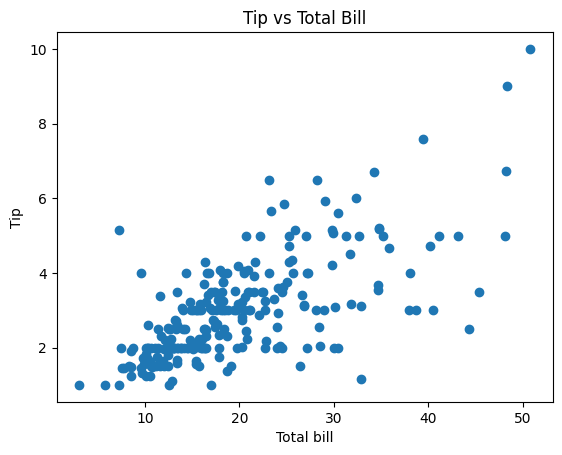

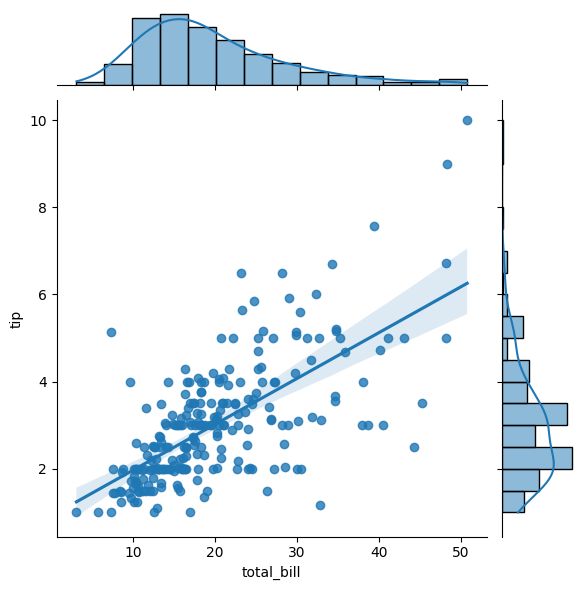

In [166]:
# create a scatter plot of tip vs total_bill
x = tips_df['total_bill']
y = tips_df['tip']
plt.scatter(x,y)
# add labels to the plot
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.title("Tip vs Total Bill")
plt.show()
# With seaborn
sns.jointplot(x='total_bill', y='tip', data=tips_df, kind='reg')

Text(0.5, 1.0, 'Ratio of the tip over Total Bill by Sex')

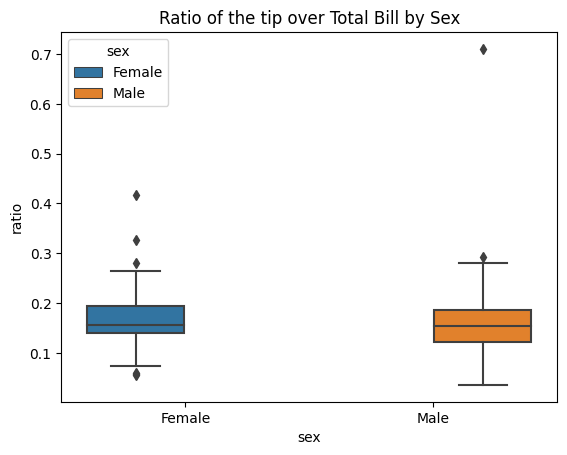

In [201]:
# create a boxplot of tip with respect to total_bill separated by sex
ratio = tips_df['tip']/tips_df['total_bill']
new_tips_df = pd.DataFrame({'sex':tips_df['sex'], 'ratio':ratio})
sns.boxplot(x="sex", y="ratio", hue="sex", data=new_tips_df) 
plt.title("Ratio of the tip over Total Bill by Sex") # The title of the plot

Text(0.5, 1.0, 'Histogram of total_bill')

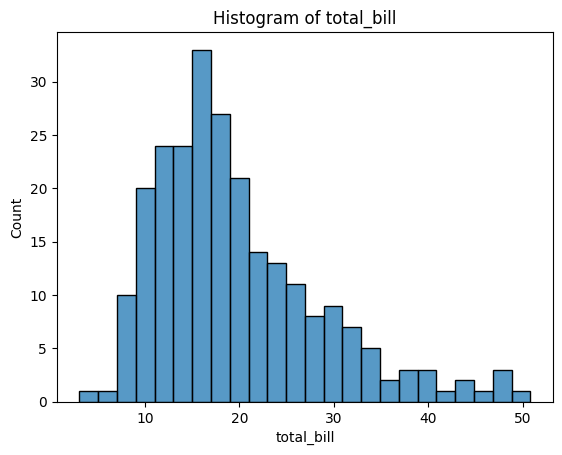

In [216]:
# Total bill hist
sns.histplot(tips_df['total_bill'], bins = 24)
plt.title("Histogram of total_bill")


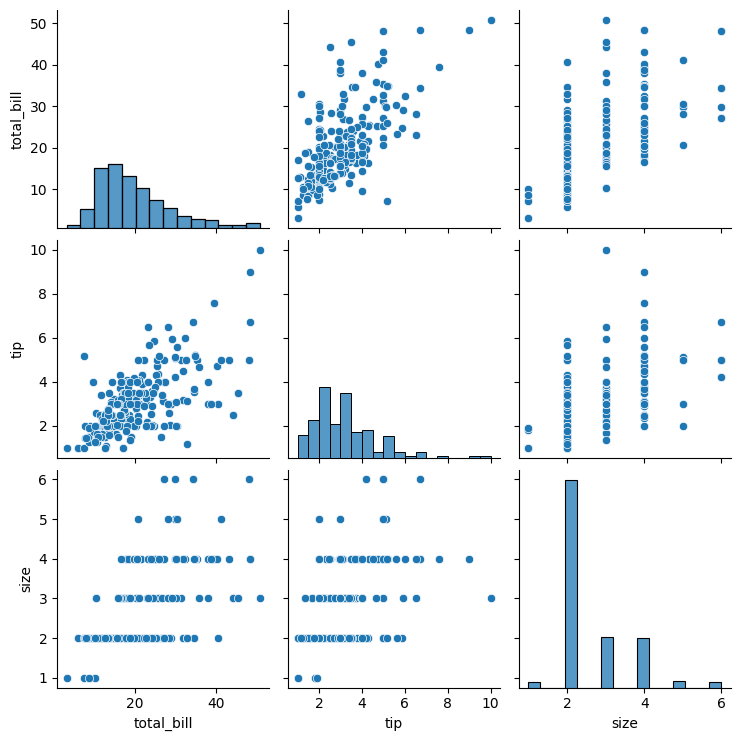

In [218]:
# pairplot statistic connections
sns.pairplot(data=tips_df, vars = ['total_bill', 'tip','size'])

Text(0, 0.5, 'AVG bill')

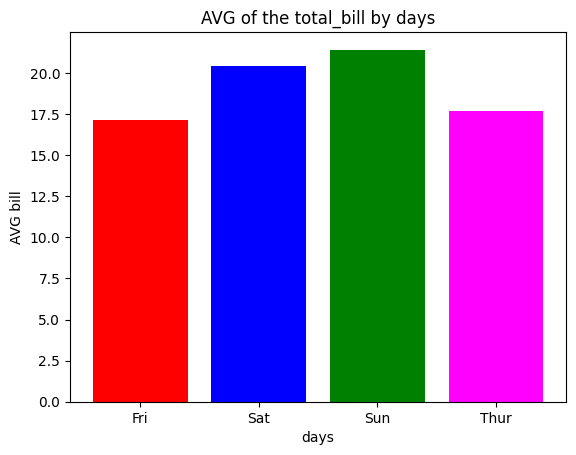

In [267]:
# AVG of the total_bill by days
days = tips_df.groupby('day')['day'].unique()
days = list(map(lambda d: d[0],days))
tips_df_grouped = tips_df.groupby('day')['total_bill'].mean()
color = ['red','blue','green','magenta']
plt.bar(days,tips_df_grouped, color = color)
plt.title("AVG of the total_bill by days")
plt.xlabel("days")
plt.ylabel("AVG bill")

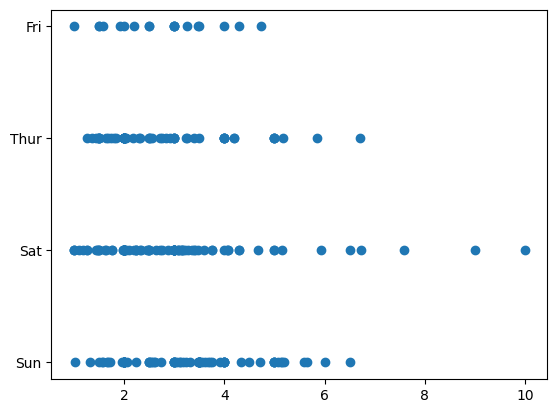

In [337]:
# Tip over days - scatter
x = tips_df['tip']
y = tips_df['day']
plt.scatter(x,y)

Text(0.5, 1.0, 'Total bill dist by day and time')

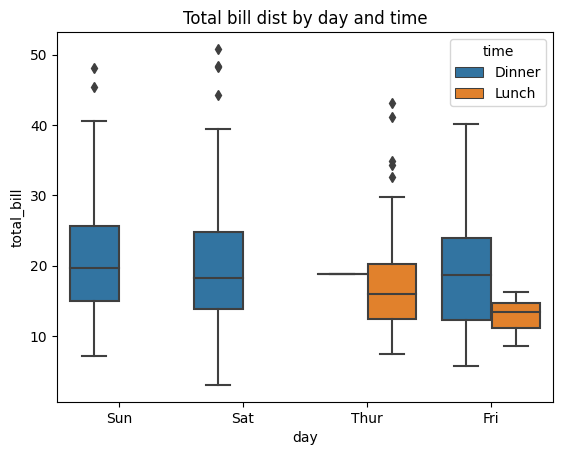

In [281]:
# Total bill dist by day and time
sns.boxplot(x="day", y="total_bill", hue="time", data=tips_df) 
plt.title("Total bill dist by day and time")


Text(0.5, 1.0, 'Lunch')

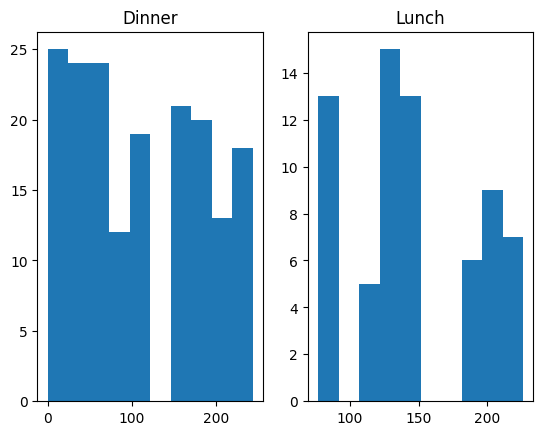

In [321]:
# Two histigrams
times = tips_df.groupby('time')
fig,ax = plt.subplots(1,2)
ax[0].hist(times.groups['Dinner'])
ax[0].set_title('Dinner')
ax[1].hist(times.groups['Lunch'])
ax[1].set_title('Lunch')


<AxesSubplot: xlabel='tip', ylabel='total_bill'>

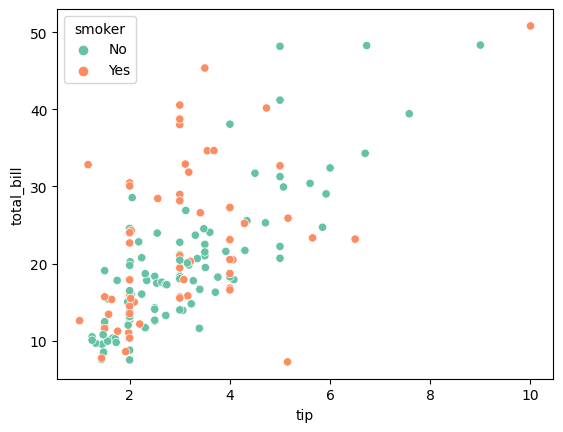

In [336]:
# Total_bill over tip by male and if he is smoking
male_df = tips_df[tips_df['sex'] == 'Male']
sns.scatterplot(data=male_df, x="tip", y="total_bill", hue="smoker", palette="Set2")
